In [282]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sb
from numpy.random import randn
import csv
from datetime import date, datetime

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

import all libraries above

In [283]:
filename= 'C:/Users/Wayne/Desktop/First Data Project/Raw Filtered Data/Anual_data_plot.csv'
df = pd.read_csv(filename, parse_dates=['Date'])
df['DOW'] = df['Date'].dt.weekday_name
del df['Unnamed: 0']

In [300]:
filename2= 'C:/Users/Wayne/Desktop/First Data Project/Raw Filtered Data/Plot2017.csv'
df3 = pd.read_csv(filename2,parse_dates=['Date'])
df3['DOW'] = df3['Date'].dt.weekday_name
del df3['Unnamed: 0']

Adding the "DOW" column above using pandas.Series.dt.weekday_name

In [285]:

df2=df[df['Max'] >= int(1)]
df4=df3[df3['Max'] >= int(1)]
#df2 = df.set_index('Date')
df2.head()

,Date,Max,Min,DOW
4,2016-01-05,44.0,24.0,Tuesday
5,2016-01-06,48.0,25.0,Wednesday
10,2016-01-11,40.0,13.0,Monday
12,2016-01-13,44.0,20.0,Wednesday
19,2016-01-20,33.0,28.0,Wednesday


In [286]:
df2 = df2.set_index('Date')
df4=df4.set_index('Date')
df2.head()

,Max,Min,DOW
Date,,,
2016-01-05,44.0,24.0,Tuesday
2016-01-06,48.0,25.0,Wednesday
2016-01-11,40.0,13.0,Monday
2016-01-13,44.0,20.0,Wednesday
2016-01-20,33.0,28.0,Wednesday


Text(0,0.5,'Day of the Week')

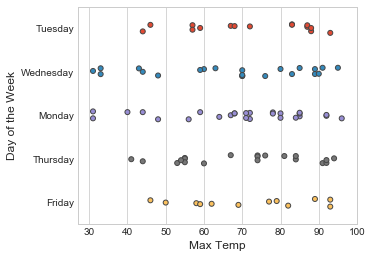

In [287]:
sb.stripplot(x="Max", y='DOW', data=df2, jitter=True, linewidth=1)
plt.xlabel('Max Temp')
plt.ylabel('Day of the Week')
#df2['Max'].plot()

In [288]:
Y = 2016 
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [289]:
season = []
for x in df2.index:
    season.append(get_season(x))
    
#Next is for dataset 2017
season2 = []
for x in df4.index:
    season2.append(get_season(x))
    

All the above is doing is taking the index of the dataframe df.index (all the index is for this dataframe is are the dates that people actually called out of work on) and with each date in each row, plugging it into the function def get_season(now): and appending the corresponding season to the list seasons.  

In [290]:
sea = np.asarray(season)
sea2 = np.asarray(season2)

Had to make the list season = [] into an array (sea) before it could be assigned as a column in the dataframe below. df2['Season'] = sea

In [291]:
df2['Season'] = sea
df4['Season'] = sea2

In [292]:
df2.head()

,Max,Min,DOW,Season
Date,,,,
2016-01-05,44.0,24.0,Tuesday,winter
2016-01-06,48.0,25.0,Wednesday,winter
2016-01-11,40.0,13.0,Monday,winter
2016-01-13,44.0,20.0,Wednesday,winter
2016-01-20,33.0,28.0,Wednesday,winter


In [293]:
#Combine the two datasets 2016 and 2017 to one df5
df5 = pd.concat([df2, df4], ignore_index=False)

In [294]:
#Save new dataset
df5.to_csv('All_data_plot.csv')

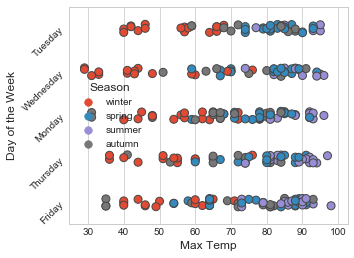

In [295]:
sb.stripplot(x="Max", y='DOW', data=df5,size=8, jitter=True,linewidth=1,hue='Season')
plt.xlabel('Max Temp')
plt.ylabel('Day of the Week')
plt.yticks(rotation=45)
plt.show()

Was trying to create as much information as possible in fig. given the amount of data in dataframe. hue = 'Season' was an eye opener for me. The 'key' is sized and placed correctly when enlarged. 

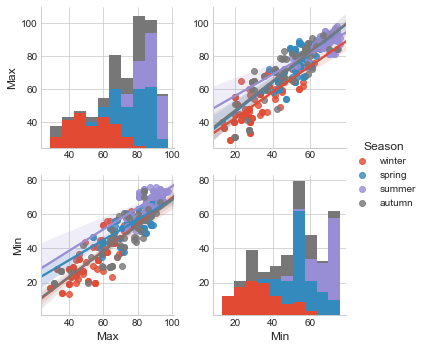

In [296]:
sb.pairplot(df5, hue='Season', kind='reg')
plt.show()

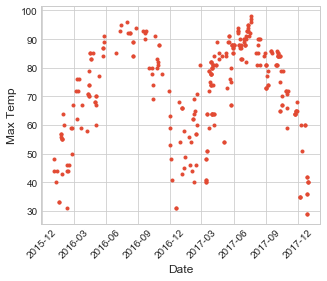

In [302]:


#df2['Max'].plot()
plt.plot(df5['Max'], marker='.', linestyle='none')
#plt.plot(x='Season',y='Max', marker='.', linestyle='none')
plt.xlabel('Date')
plt.ylabel('Max Temp')
plt.xticks(rotation=45)

#plt.annotate('what',(mdates.date2num('2016-04-01'),df5.Max[30]),xytext=(15,15),textcoords='offset points',arrowprops=dict(arrowstyle='-|>'))

plt.show()

Using plt.plot(y) defaults the x axis to the index

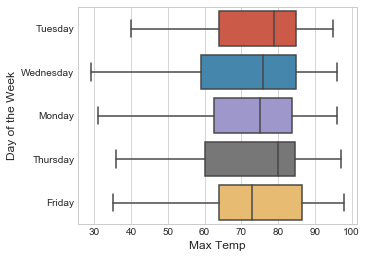

In [298]:
sb.boxplot(x='Max',y='DOW', data=df5)
plt.xlabel('Max Temp')
plt.ylabel('Day of the Week')
plt.show()

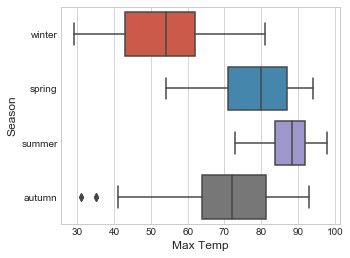

In [299]:
sb.boxplot(x='Max',y='Season', data=df5)
plt.xlabel('Max Temp')
plt.ylabel('Season')
plt.show()